FOR THIS **IMPORTANT** USE THE SELF-MADE-FACE-MASK-DATASET (https://self-built-masked-face-recognition-dataset.zip)
1. SAVE THE DATASET ZIP FILE IN YOUR GOOGLE DRIVE[link text]
2. MOUNT THE DRIVE 
3. UNZIP THE DATASET AND MAKE SURE ALL DIRECTORY NAMES ARE SAME AS IN THE CODE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/RMFD'

In [ ]:
import pandas as pd                               #reading, writing and manipulating the data (using tables)
import numpy as np                                #Library for linear algebra and some probabiltity (raw data) 
import tensorflow as tf                           #library for numerical computation that makes machine learning faster and easier
from tensorflow import keras                      #we may not add this since keras is already thier in tensorflow
from tensorflow.keras.models import Sequential    #To create the sequential layer
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout  #To create the model
from tensorflow.keras.optimizers import Adam      #Adam optimizer
from keras.preprocessing import image             #used for image classification
from keras.preprocessing.image import ImageDataGenerator  #used to expand the training dataset in order to improve the performance and ability of the model to generalize
import matplotlib.pyplot as plt                   #library to plot graphs
from google.colab import files                    #To be able to upload files

In [ ]:
import os

In [ ]:
batch_size = 8
epochs = 15

In [ ]:
directory = 'self-built-masked-face-recognition-dataset'

In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.2,        # Splits the data into training (80%) and validation (20%)
                                   rescale = 1./255,            # Multiple the colors by a number between 0-1 to process data faster
                                   rotation_range=40,           #rotate the images
                                   width_shift_range=0.2,     
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')        #add new pixels when the image is rotated or shifted


In [ ]:
train_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                seed=2020,                      # to make the result reproducible
                                subset = 'training')            # Specify this is training set


Found 74138 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                subset = 'validation')  

Found 18533 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train_generator)

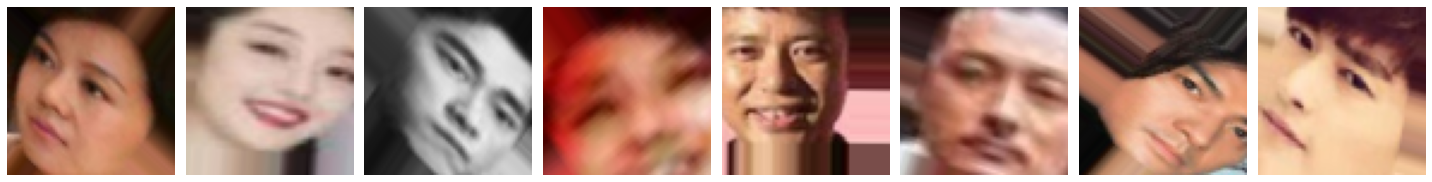

[0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

#displaying the images and thier labels where as 1 with mask and 0 without mask
plotImages(imgs);
print(labels);


In [ ]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Flatten(),
                    Dense(units=64, activation= 'relu'),
                    #means the output is 0,1 (the labels) and the P(c=0) +P(c=1) = 1 
                    Dense(units=1, activation='sigmoid'), 

])

In [ ]:

model.summary()

"""Compile the model using the **Adam** optimizer with **learning rate** of `0.0001`, a **loss** of `binary_crossentropy`, and we'll look at `accuracy` as our performance **metric**."""

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

"""We use the `train_generator` because we are now only training the data. The 
validation data is the `validation_generator`
"""
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
#Training the model
history = model.fit(train_generator ,epochs = epochs,validation_data= validation_generator)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

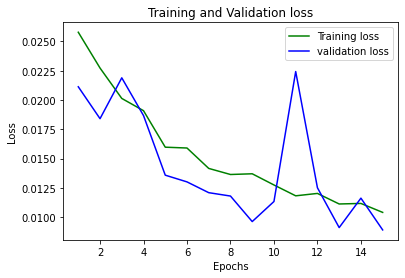

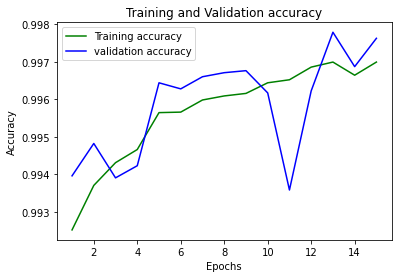

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochstoplot = range(1,epochs+1)
plt.plot(epochstoplot, loss_train, 'g', label='Training loss')
plt.plot(epochstoplot, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting the accuracy of validation and training 
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochstoplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochstoplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

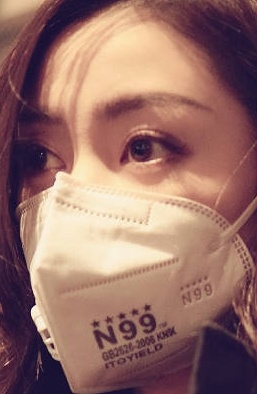



The person is wearing a mask. 



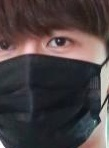



The person is wearing a mask. 



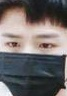



The person is wearing a mask. 



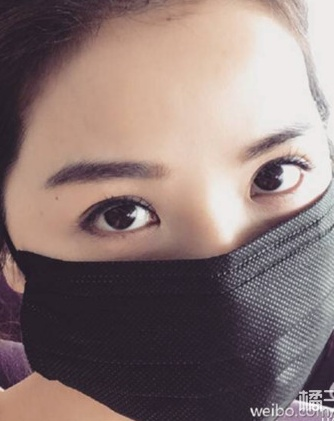



The person is wearing a mask. 



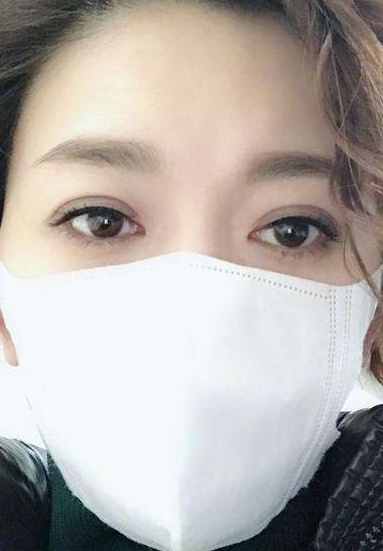



The person is wearing a mask. 



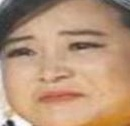



The person is not wearing a mask.



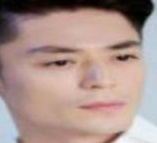



The person is not wearing a mask.



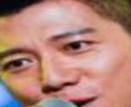



The person is not wearing a mask.



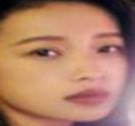



The person is not wearing a mask.



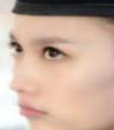



The person is not wearing a mask.



In [ ]:
#here ihad uploaded 10 random no-mask and mask images named i.jpg (i is any integer)
# upload your files as 1.jpg ,2.jpg -----n.jpg  (n files)

from IPython.display import Image, display
TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
# change ther upper bound of loop to number of images (n) as shown above here my n = 11
for i in range (1,11):   
  img_directory = str(i) + '.jpg'
  img_pred = image.load_img(img_directory, target_size = (70, 70))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)

  prediction = model.predict(img_pred)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  if(int(prediction[0][0]) == 1):
    print(TGREEN + "The person is wearing a mask. \n")
  else:
    print(TRED + "The person is not wearing a mask.\n")

In [ ]:
print(history)

In [ ]:
weights = model.get_weights()

In [ ]:
model.save('best_model')

INFO:tensorflow:Assets written to: best_model/assets


In [ ]:
model.save_weights('modelweights')

In [ ]:
model.save_weights('weights', save_format='h5')

KNN